In [2]:
import os.path
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
image_dir = "/Users/mykko/Documents/project/decision/data/videos_images/"
video_name = "video1"
image_name = "00000140.jpg"

In [4]:
image_path = os.path.join(image_dir, video_name, image_name)

In [5]:
src = cv2.imread(image_path)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

In [6]:
src[321,646]

array([208, 217, 137], dtype=uint8)

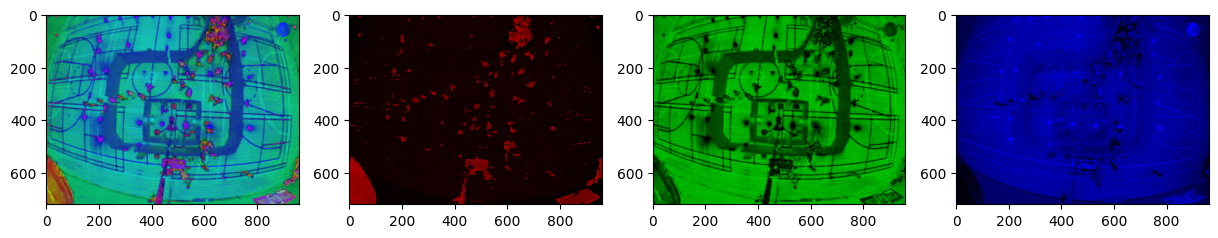

In [7]:
HSV = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
hsl_img_1 = HSV.copy()
hsl_img_2 = HSV.copy()
hsl_img_3 = HSV.copy()
hsl_img_1[:,:,1] = 0  #### HUE --> ZERO  ####
hsl_img_1[:,:,2] = 0
hsl_img_2[:,:,0] = 0  #### SATURATION --> ZERO ####
hsl_img_2[:,:,2] = 0
hsl_img_3[:,:,0] = 0  #### LIGHTNESS --> ZERO ####
hsl_img_3[:,:,1] = 0

f, axes = plt.subplots(1,4, figsize = (15,15))
list = [HSV, hsl_img_1,hsl_img_2,hsl_img_3]
i = 0
for ax in axes:
    # temp = list[i][:,:,::-1]
    ax.imshow(list[i])
    i+=1

In [8]:
HSV[321,646]

array([ 87,  94, 217], dtype=uint8)

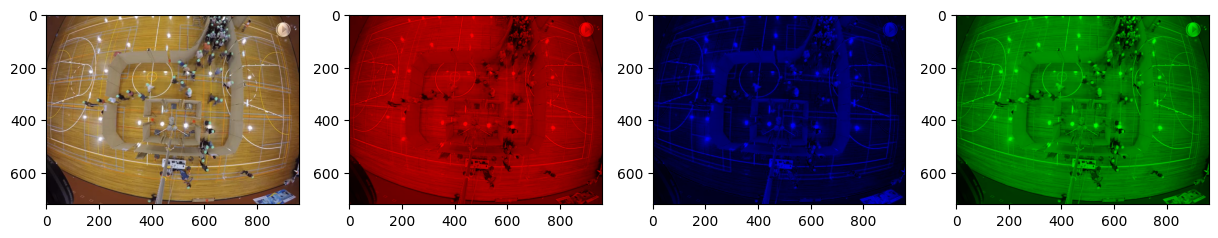

In [9]:
new_img_1 = src.copy()
new_img_2 = src.copy()
new_img_3 = src.copy()
new_img_1[:,:,0] = 0 # making R channel zero    ####For BLUE channel#####
new_img_1[:,:,1] = 0 #making G channel zero
new_img_2[:,:,1] = 0####For RED color Channel####
new_img_2[:,:,2] = 0
new_img_3[:,:,0] = 0###For GREEN Channel####
new_img_3[:,:,2] = 0

f, axes = plt.subplots(1,4, figsize = (15,15))
list = [src, new_img_1,new_img_2,new_img_3]
i = 0
for ax in axes:
    temp = list[i][:,:,::-1]
    ax.imshow(temp)
    i+=1

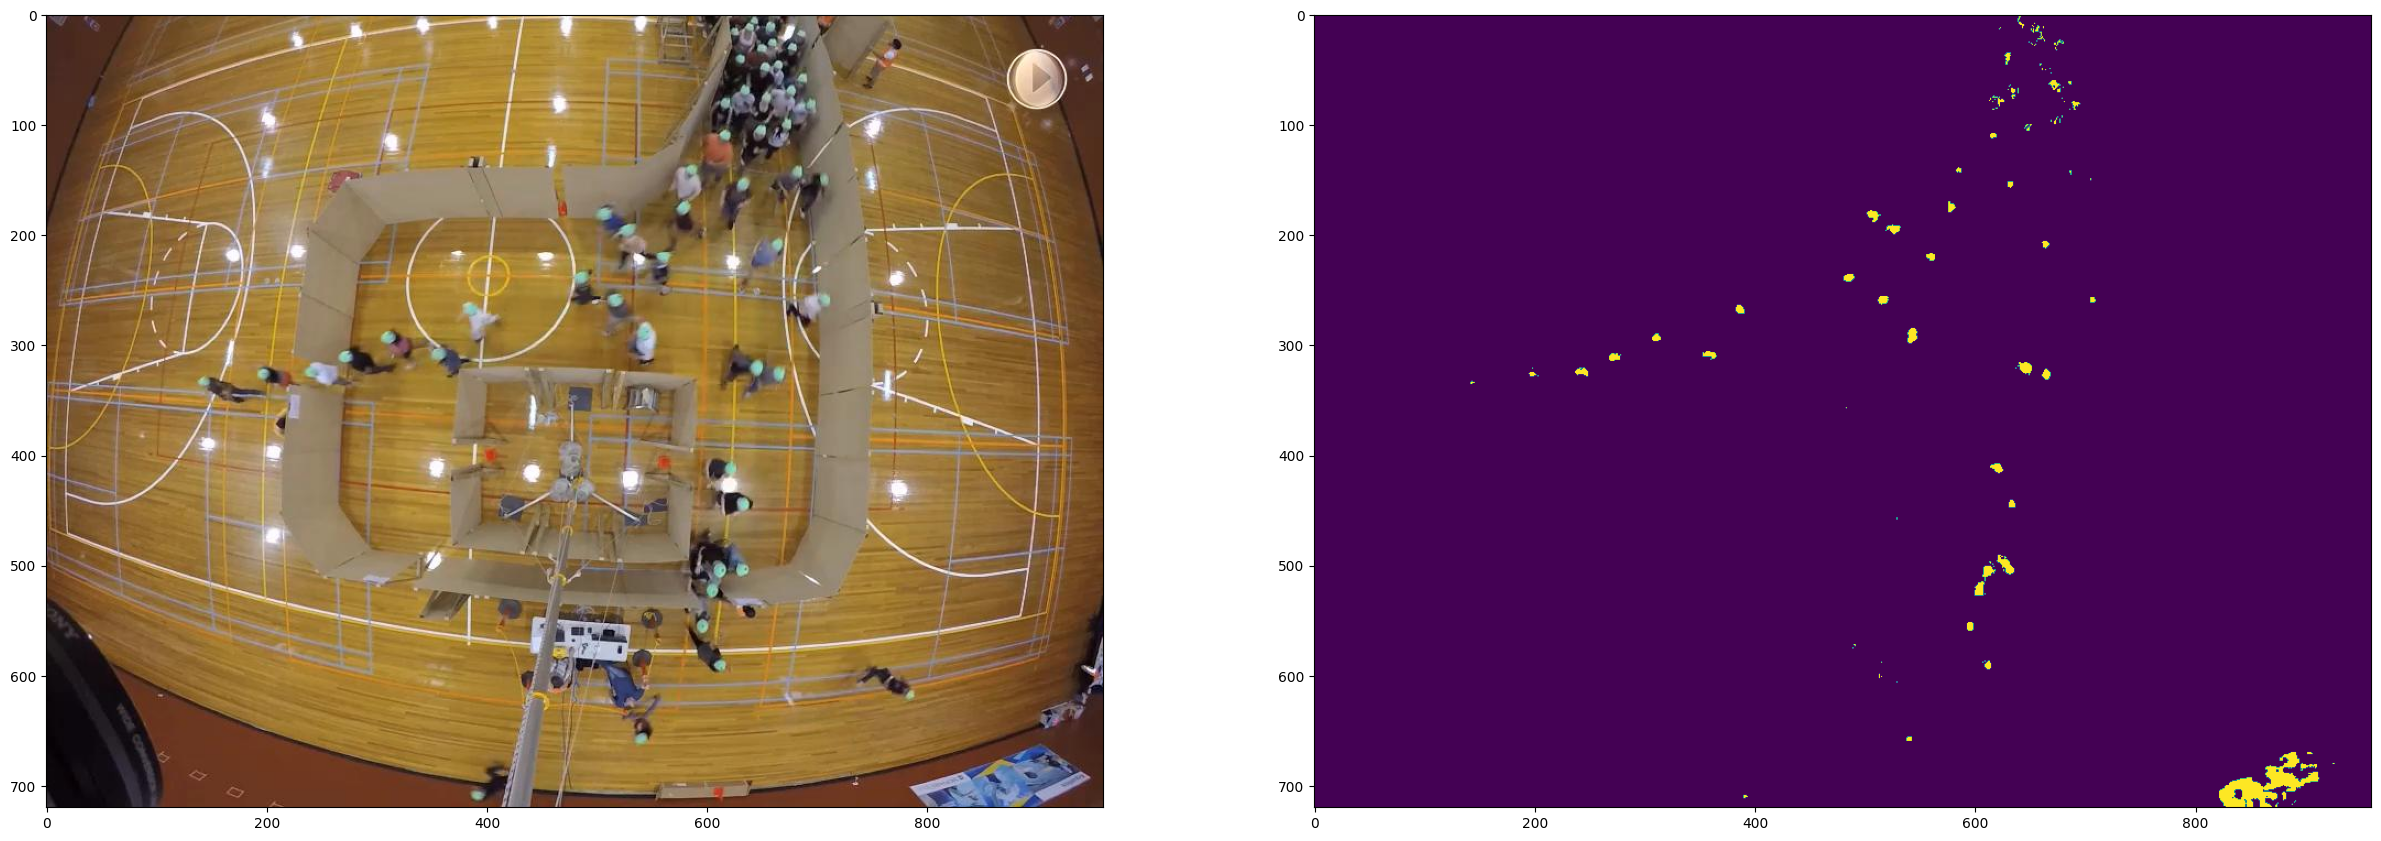

In [10]:
minGreen = np.array([60, 50, 50])
maxGreen = np.array([110, 255, 255])

# 通过掩码控制的按位与运算，锁定蓝色、绿色、红色区域
mask = cv2.inRange(HSV, minGreen, maxGreen)
green = cv2.bitwise_and(src, src, mask=mask)

f, axes = plt.subplots(1,2, figsize = (30,30))
list = [src[:,:,::-1],mask]
i = 0
for ax in axes:
    # temp = list[i][:,:,::-1]
    ax.imshow(list[i])
    i+=1
# 展示各个标记指定的颜色图像

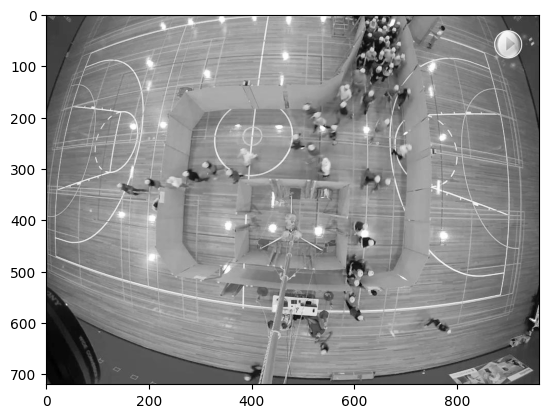

In [11]:
plt.imshow(src_gray, cmap="Greys_r")

0


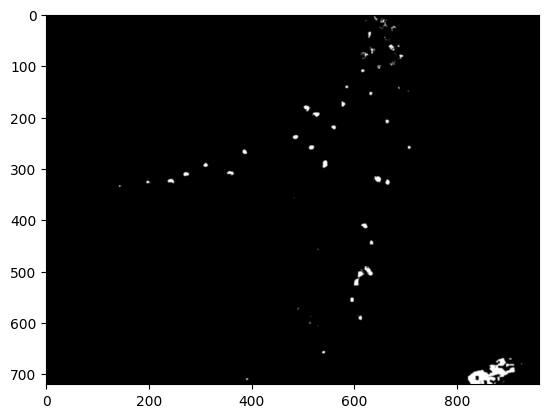

In [13]:

kernel1 = np.ones((3,3), dtype='float32')/9
result = cv2.filter2D(mask, -1,kernel=kernel1)

plt.imshow(result, cmap="Greys_r")

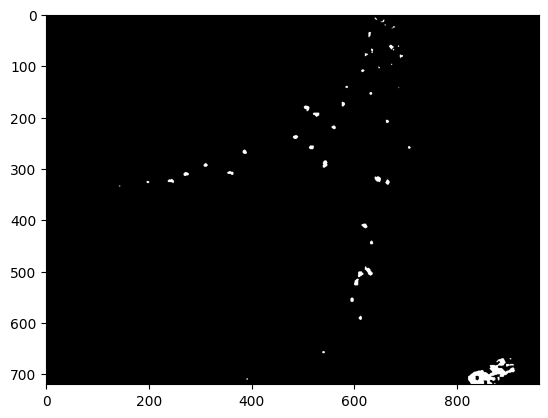

In [15]:
n = 0

ret, result1 = cv2.threshold(result, 255.0 * 5 / 9 - 1, 255, cv2.THRESH_BINARY)
plt.imshow(result1, cmap="Greys_r")


In [16]:
n = 0
for i in result1:
    for j in i:
        if j != 0 and j != 255:
            n += 1
print(n)

0
